# Cluster
### https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

In [55]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt
#from sklearn.datasets import make_blobs
# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

iris_names         : ['setosa' 'versicolor' 'virginica']
iris_feature_names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


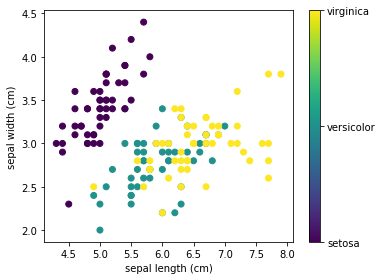

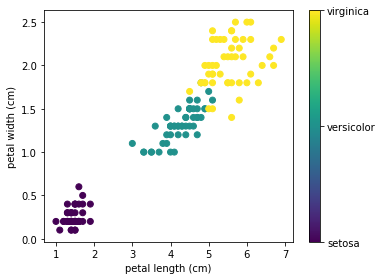

In [87]:
%matplotlib inline
X = iris.data
y = iris.target
print('iris_names         : %s'%iris.target_names)
print('iris_feature_names : %s'%iris.feature_names)
for num in range(2):
    formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1+num)
    plt.scatter(iris.data[:, 0+num*2], iris.data[:, 1+num*2], c=iris.target)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris.feature_names[0+num*2])
    plt.ylabel(iris.feature_names[1+num*2])
    plt.tight_layout()
    plt.show()

# K-Means

## General-purpose, even cluster size, flat geometry, not too many clusters

分群結果：
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
---
真實品種：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



Homogeneity: 0.641
Completeness: 0.644
V-measure: 0.643
Adjusted Rand Index: 0.592
Adjusted Mutual Information: 0.638
Silhouette Coefficient: 0.654
[0.5817500491982805, 0.4630420362927047, 0.3851741763064142, 0.34590127959487793, 0.33650883691913264, 0.33454310433534723, 0.3379922864162184, 0.3549588988935221, 0.3446698206120295]


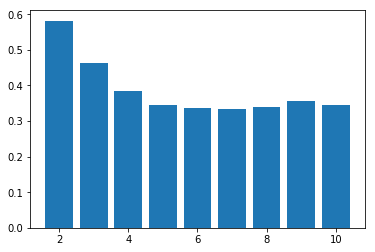

In [92]:
# KMeans
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(iris_X)

# 印出分群結果
cluster_labels = kmeans_fit.labels_
print("分群結果：")
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = iris.target
print("真實品種：")
print(iris_y)
print('\n\n')

print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris_y, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(iris_y, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(iris_y, cluster_labels))
print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(iris_y, cluster_labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(iris_y, cluster_labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(iris_X, cluster_labels, metric='sqeuclidean'))
print('\n\n')

# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(iris_X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
print(silhouette_avgs)
# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()

# Hierarchical
## Many clusters, possibly connectivity constraints, non Euclidean distances

分群結果：
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
---
真實品種：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



Homogeneity: 0.658
Completeness: 0.694
V-measure: 0.675
Adjusted Rand Index: 0.615
Adjusted Mutual Information: 0.671
Silhouette Coefficient: 0.621



[0.5770346019475988, 0.4466890410285909, 0.4006363159855973, 0.33058726295230545, 0.31485480100512825, 0.316969830299128, 0.31094652900725794, 0.3114342247547166, 0.3161120375980681]


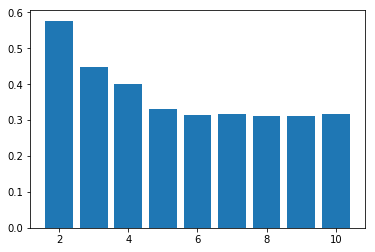

In [93]:
# Hierarchical Clustering
hclust_fit = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 3).fit(iris_X)

# 印出分群結果
cluster_labels = hclust_fit.labels_
print("分群結果：")
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = iris.target
print("真實品種：")
print(iris_y)
print('\n\n')

print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris_y, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(iris_y, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(iris_y, cluster_labels))
print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(iris_y, cluster_labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(iris_y, cluster_labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(iris_X, cluster_labels, metric='sqeuclidean'))
print('\n\n')

# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    hclust_fit = cluster.AgglomerativeClustering(n_clusters = k).fit(iris_X)
    cluster_labels = hclust_fit.labels_
    silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
print(silhouette_avgs)
# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()

# Affinity propagation
## Many clusters, uneven cluster size, non-flat geometry

分群結果：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
---
真實品種：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



Estimated number of clusters: 3
Homogeneity: 0.800
Completeness: 0.805
V-measure: 0.802
Adjusted Rand Index: 0.802
Adjusted Mutual Information: 0.800
Silhouette Coefficient: 0.688


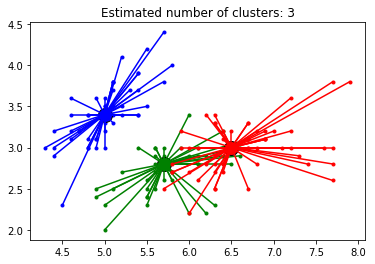

In [58]:
# Compute Affinity Propagation
af = cluster.AffinityPropagation(preference=-50).fit(iris_X)
cluster_centers_indices = af.cluster_centers_indices_

# 印出分群結果
cluster_labels = af.labels_
print("分群結果：")
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = iris.target
print("真實品種：")
print(iris_y)
print('\n\n')


n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris_y, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(iris_y, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(iris_y, cluster_labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(iris_y, cluster_labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(iris_y, cluster_labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(iris_X, cluster_labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = cluster_labels == k
    cluster_center = iris_X[cluster_centers_indices[k]]
    plt.plot(iris_X[class_members, 0], iris_X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in iris_X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Mean-shift
## Many clusters, uneven cluster size, non-flat geometry

In [96]:
# MeanShift
bandwidth = cluster.estimate_bandwidth(iris_X, quantile=0.18, n_samples=150)

Mean_shift = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(iris_X)

# 印出分群結果
cluster_labels = Mean_shift.labels_
print("分群結果：")
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = iris.target
print("真實品種：")
print(iris_y)
print('\n\n')

print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris_y, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(iris_y, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(iris_y, cluster_labels))
print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(iris_y, cluster_labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(iris_y, cluster_labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(iris_X, cluster_labels, metric='sqeuclidean'))

分群結果：
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 3 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 2 0 2 0 0 2 0 2 0 2 0
 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 2 2 0 0 0
 0 0]
---
真實品種：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



Homogeneity: 0.654
Completeness: 0.682
V-measure: 0.668
Adjusted Rand Index: 0.549
Adjusted Mutual Information: 0.661
Silhouette Coefficient: 0.512


# Spectral clustering
## Few clusters, even cluster size, non-flat geometry

In [97]:
# Spectral
Spectral = cluster.SpectralClustering( n_clusters=3, eigen_solver='arpack').fit(iris_X)

# 印出分群結果
cluster_labels = Spectral.labels_
print("分群結果：")
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = iris.target
print("真實品種：")
print(iris_y)
print('\n\n')

print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris_y, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(iris_y, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(iris_y, cluster_labels))
print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(iris_y, cluster_labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(iris_y, cluster_labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(iris_X, cluster_labels, metric='sqeuclidean'))

分群結果：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
---
真實品種：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



Homogeneity: 0.682
Completeness: 0.697
V-measure: 0.690
Adjusted Rand Index: 0.645
Adjusted Mutual Information: 0.686
Silhouette Coefficient: 0.652


In [100]:
# DBSCAN
## Non-flat geometry, uneven cluster sizes

分群結果：
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1]
---
真實品種：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



Estimated number of clusters: 2
Estimated number of noise points: 34
Homogeneity: 0.501
Completeness: 0.523
V-measure: 0.511
Adjusted Rand Index: 0.442
Adjusted Mutual Information: 0.505
Silhouette Coefficient: 0.357


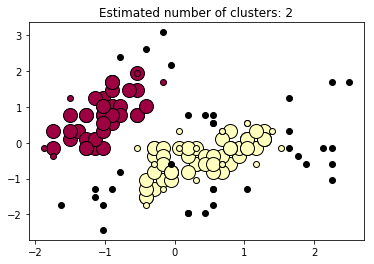

In [101]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


iris_X = StandardScaler().fit_transform(iris_X)
labels_true =  iris.target

# #############################################################################
# Compute DBSCAN
db = DBSCAN().fit(iris_X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# 印出分群結果
labels = db.labels_

print("分群結果：")
print(labels)
print("---")

# 印出品種看看
print("真實品種：")
print(labels_true)
print('\n\n')

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(iris_X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = iris_X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = iris_X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()